<a href="https://colab.research.google.com/github/daeunkk/dl11/blob/main/project/dl11_proj02_XOR_MLP_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR problem
## numpy with back propagation
## MLP
- 1-hidden layer
- 2 hidden-layers
- hyperparameter setting

In [1]:
# numpy - bak propagation with iterations=20000
import numpy as np
# XOR solution by MLP

# 시그모이드 함수
def actf(x):
	return 1/(1+np.exp(-x))

# 시그모이드 함수의 미분치
def actf_deriv(x):
	    return x*(1-x)

# 입력유닛의 개수, 은닉유닛의 개수, 출력유닛의 개수
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

# 훈련 입력과 출력
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # (4,2)
T = np.array([[0], [1], [1], [0]])              # (4,1)

# 가중치를 –1.0에서 1.0 사이의 난수로 초기화한다.
W1 = 2*np.random.random((inputs, hiddens))-1    # (2,2)
W2 = 2*np.random.random((hiddens, outputs))-1   # (2,1)
B1 = np.zeros(hiddens)                          # (2,)
B2 = np.zeros(outputs)                          # (1,)
print(W1.shape,W2.shape,B1.shape,B2.shape)

# 순방향 전파 계산
def predict(x):
        layer0 = x			# 입력을 layer0에 대입한다. 
        Z1 = np.dot(layer0, W1)+B1	# 행렬의 곱을 계산한다. 
        layer1 = actf(Z1)		# 활성화 함수를 적용한다. 
        Z2 = np.dot(layer1, W2)+B2	# 행렬의 곱을 계산한다. 
        layer2 = actf(Z2)		# 활성화 함수를 적용한다. 
        return layer0, layer1, layer2
    
# 역방향 전파 계산
def fit():
    global W1, W2, B1, B2
    for i in range(20000):
            layer0, layer1, layer2 = predict(X) # input-batch-size = 4
            layer2_error = layer2-T
            # print(layer0.shape,layer1.shape,layer2.shape)
            
            layer2_delta = layer2_error*actf_deriv(layer2)
            layer1_error = np.dot(layer2_delta, W2.T)
            layer1_delta = layer1_error*actf_deriv(layer1)
            # print(layer2_error.shape)
            # print(layer2_delta.shape)
            # print(layer1_error.shape)
            # print(layer1_delta.shape)
            
            W2 += -learning_rate*np.dot(layer1.T, layer2_delta)/4.0  # 4개의 입력에 대한 평균 기울기
            W1 += -learning_rate*np.dot(layer0.T, layer1_delta)/4.0
            B2 += -learning_rate*np.sum(layer2_delta, axis=0)/4.0
            B1 += -learning_rate*np.sum(layer1_delta, axis=0)/4.0

def test():
    for x, y in zip(X, T):
        x = np.reshape(x, (1, -1))		# 하나여도 2차원 형태이어야 한다.
        layer0, layer1, layer2 = predict(x)
        print(x, y, layer2)

fit()
test()

(2, 2) (2, 1) (2,) (1,)
[[0 0]] [0] [[0.02566312]]
[[0 1]] [1] [[0.49877909]]
[[1 0]] [1] [[0.97553791]]
[[1 1]] [0] [[0.50103368]]


> ### Dose numpy with back propagation solve XOR problem?

In [2]:
# Keras MLP with 1 hidden layer, epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=2, input_shape=(2,), activation='sigmoid')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()
 
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 - 1s - loss: 0.2627 - 541ms/epoch - 135ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.2625 - 16ms/epoch - 4ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.2623 - 23ms/epoch - 6ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.2622 - 15ms/epoch - 4ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.2620 - 18ms/epoch - 4ms/step
Epoch 6/2000
4/4 - 0s - loss: 0.2619 - 21ms/epoch - 5ms/step
Epoch 7/2000
4/4 - 0s - loss: 0.2617 - 20ms/epoch - 5ms/step
Epoch 8/2000
4/4 - 0s - loss

> ### Not good result

In [3]:
# # Keras MLP with 2 hidden layers and epochs=2000
import numpy as np
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=16, input_shape=(2,), activation='relu')) #①
model.add(tf.keras.layers.Dense(units=8, activation='relu')) #
model.add(tf.keras.layers.Dense(units=1,  activation='sigmoid')) #		
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.SGD(lr=0.1)) 

model.summary()

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y = np.array([[0], [1], [1], [0]])

model.fit(X, y, batch_size=1, epochs=2000, verbose=2)

print(model.predict(X))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                48        
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
4/4 - 0s - loss: 0.2500 - 425ms/epoch - 106ms/step
Epoch 2/2000
4/4 - 0s - loss: 0.2491 - 12ms/epoch - 3ms/step
Epoch 3/2000
4/4 - 0s - loss: 0.2482 - 11ms/epoch - 3ms/step
Epoch 4/2000
4/4 - 0s - loss: 0.2472 - 13ms/epoch - 3ms/step
Epoch 5/2000
4/4 - 0s - loss: 0.2463 - 15ms/epoch - 4ms/step
Epoch 6/2000

---
---

## [DIY] Hyperparameter control
- Find the optimal training condition with epoches=2000

> ## Try Bard, ChatGPT, Bing AI
- ### Write a MLP code to solve XOR using Keras.

---

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# XOR 데이터셋 정의
x_train = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train = [0, 1, 1, 0]

# MLP 모델 정의
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(x_train, y_train, epochs=2000, verbose=0)

# 모델 예측
x_test = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_test = model.predict(x_test)
print(y_test)

1/1 [==============================] - 0s 93ms/step
[[0.14635918]
 [0.95305103]
 [0.9402229 ]
 [0.04621315]]


In [11]:
 !pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# import numpy as np 
# import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

# 데이터 세트 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)
                             
# 신경망 모델 구축
def build_model():
    network = tf.keras.models.Sequential()
    network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(tf.keras.layers.Dense(10, activation='sigmoid'))

    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

# 하이퍼 매개변수 딕셔너리
param_grid = {
              'epochs':[1, 2, 3],	# 에포크 수: 1, 2, 3
              'batch_size':[32, 64]	# 배치 크기: 32, 64
             }

# 케라스 모델을 scikeras에서 사용하도록 포장한다. 
model = KerasClassifier(model = build_model, verbose=1)

## Elapsed time start
import time
start = time.time()

# 그리드 검색
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid, 
    cv=3, 
    # n_jobs=-1 # comment this line to avoid out-of-memory
)

# 그리드 검색 결과 출력
grid_result = gs.fit(train_images, train_labels)

## Elapsed time end
end = time.time()
print('Elapsed time:', end - start) # Elapsed time: 122.5, 189.5

print(grid_result.best_score_) # 0.9725, 0.9711
print(grid_result.best_params_) # {'batch_size': 64, 'epochs': 3}

1250/1250 [==============================] - 15s 10ms/step - loss: 0.2430 - accuracy: 0.9282


625/625 [==============================] - 2s 3ms/step
Epoch 1/2
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2406 - accuracy: 0.9291
Epoch 2/2
625/625 [==============================] - 3s 4ms/step
Epoch 1/2
1250/1250 [==============================] - 12s 9ms/step - loss: 0.2404 - accuracy: 0.9291
Epoch 2/2
625/625 [==============================] - 2s 3ms/step
Epoch 1/2
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2360 - accuracy: 0.9304
Epoch 2/2
625/625 [==============================] - 2s 3ms/step
Epoch 1/3
1250/1250 [==============================] - 11s 8ms/step - loss: 0.2394 - accuracy: 0.9284
Epoch 2/3
1250/1250 [==============================] - 9s 8ms/step - loss: 0.1025 - accuracy: 0.9698
Epoch 3/3
625/625 [==============================] - 2s 3ms/step
Epoch 1/3
1250/1250 [==============================] - 10s 7ms/step - loss: 0.2385 - accuracy: 0.9295
Epoch 2/3
1250/1250 [==============================] - 15s 12ms/step - los

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [17]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
# model.add(Dense(16, input_shape = (X_train.shape[1],), activation = 'relu'))  # X_train.shape[1]
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 16)                80        
                                                                 
 dense_48 (Dense)            (None, 8)                 136       
                                                                 
 dense_49 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


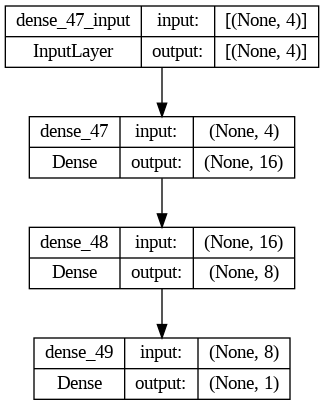

In [18]:
plot_model(model, show_shapes=True)

In [21]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 2000, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

NameError: ignored

In [19]:
# Training graphs
import numpy as np
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 6))

plt.subplot(1,1,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()
     

NameError: ignored